<a href="https://colab.research.google.com/github/rajat14xy/Bank-Risk-Prediction-Stacking-Oversampling-/blob/main/BankRiskPrediction_with_STACKING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
import numpy as np                     # For mathematical calculations 
import seaborn as sns                  # For data visualization 
import matplotlib.pyplot as plt 

In [45]:
import pandas as pd
trainDf = pd.read_csv("/content/drive/MyDrive/data,bank/Training Data.csv");


In [46]:
train_orignal=trainDf


In [47]:
train_orignal.head(3)

,Id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
0,1,1303835,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0


In [48]:
trainDf.isna().sum()

Id                     0
income                 0
age                    0
experience             0
married                0
house_ownership        0
car_ownership          0
profession             0
city                   0
state                  0
current_job_years      0
current_house_years    0
risk_flag              0
dtype: int64

In [49]:
trainDf = trainDf.drop(['profession','city','state'],axis=1)
trainDf

,Id,income,age,experience,married,house_ownership,car_ownership,current_job_years,current_house_years,risk_flag
0,1,1303835,23,3,single,rented,no,3,13,0
1,2,7574516,40,10,single,rented,no,9,13,0
2,3,3991815,66,4,married,rented,no,4,10,0
3,4,6256451,41,2,single,rented,yes,2,12,1
4,5,5768871,47,11,single,rented,no,3,14,1
...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,single,rented,no,6,11,0
251996,251997,2843572,26,10,single,rented,no,6,11,0
251997,251998,4522448,46,7,single,rented,no,7,12,0
251998,251999,6507128,45,0,single,rented,no,0,10,0


In [50]:
trainDf.set_index('Id',inplace=True)
trainDf

,income,age,experience,married,house_ownership,car_ownership,current_job_years,current_house_years,risk_flag
Id,,,,,,,,,
1,1303835,23,3,single,rented,no,3,13,0
2,7574516,40,10,single,rented,no,9,13,0
3,3991815,66,4,married,rented,no,4,10,0
4,6256451,41,2,single,rented,yes,2,12,1
5,5768871,47,11,single,rented,no,3,14,1
...,...,...,...,...,...,...,...,...,...
251996,8154883,43,13,single,rented,no,6,11,0
251997,2843572,26,10,single,rented,no,6,11,0
251998,4522448,46,7,single,rented,no,7,12,0


In [51]:
train_orignal['house_ownership'].value_counts()

rented          231898
owned            12918
norent_noown      7184
Name: house_ownership, dtype: int64

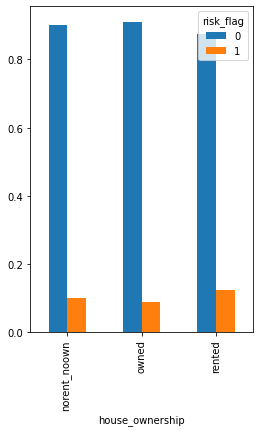

In [52]:
x=pd.crosstab(train_orignal['house_ownership'],train_orignal['risk_flag']) 

x.div(x.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False, figsize=(4,6)) 
plt.show() 

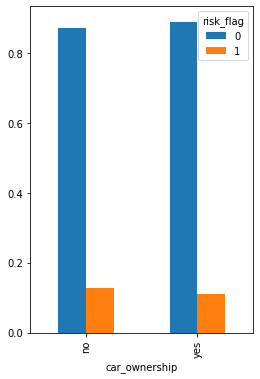

In [53]:
x=pd.crosstab(train_orignal['car_ownership'],train_orignal['risk_flag']) 

x.div(x.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False, figsize=(4,6)) 
plt.show() 

In [54]:
trainDf['married'].replace('single', 1,inplace=True) 
trainDf['married'].replace('married', 0,inplace=True) 

trainDf['house_ownership'].replace('rented', 1,inplace=True) 
trainDf['house_ownership'].replace('owned', 0,inplace=True) 
trainDf['house_ownership'].replace('norent_noown', 1,inplace=True) 

trainDf['car_ownership'].replace('no', 1,inplace=True) 
trainDf['car_ownership'].replace('yes', 0,inplace=True) 

In [55]:
trainDf

,income,age,experience,married,house_ownership,car_ownership,current_job_years,current_house_years,risk_flag
Id,,,,,,,,,
1,1303835,23,3,1,1,1,3,13,0
2,7574516,40,10,1,1,1,9,13,0
3,3991815,66,4,0,1,1,4,10,0
4,6256451,41,2,1,1,0,2,12,1
5,5768871,47,11,1,1,1,3,14,1
...,...,...,...,...,...,...,...,...,...
251996,8154883,43,13,1,1,1,6,11,0
251997,2843572,26,10,1,1,1,6,11,0
251998,4522448,46,7,1,1,1,7,12,0


In [56]:
y = trainDf['risk_flag']
X = trainDf.drop('risk_flag', axis=1)

In [57]:
from sklearn.preprocessing import StandardScaler

In [58]:
X

,income,age,experience,married,house_ownership,car_ownership,current_job_years,current_house_years
Id,,,,,,,,
1,1303835,23,3,1,1,1,3,13
2,7574516,40,10,1,1,1,9,13
3,3991815,66,4,0,1,1,4,10
4,6256451,41,2,1,1,0,2,12
5,5768871,47,11,1,1,1,3,14
...,...,...,...,...,...,...,...,...
251996,8154883,43,13,1,1,1,6,11
251997,2843572,26,10,1,1,1,6,11
251998,4522448,46,7,1,1,1,7,12


In [59]:
scaler = StandardScaler()
X1 = scaler.fit(X)
X_scaled = X1.transform(X)
X_scaled

array([[-1.28314452e+00, -1.57960273e+00, -1.18023232e+00, ...,
         6.57128741e-01, -9.14130833e-01,  7.16355856e-01],
       [ 8.95457244e-01, -5.83343354e-01, -1.40667075e-02, ...,
         6.57128741e-01,  7.31036347e-01,  7.16355856e-01],
       [-3.49268601e-01,  9.40347460e-01, -1.01363724e+00, ...,
         6.57128741e-01, -6.39936303e-01, -1.42798056e+00],
       ...,
       [-1.64912549e-01, -2.31722397e-01, -5.13851972e-01, ...,
         6.57128741e-01,  1.82647287e-01,  1.57705165e-03],
       [ 5.24618196e-01, -2.90325889e-01, -1.68001759e+00, ...,
         6.57128741e-01, -1.73671442e+00, -1.42798056e+00],
       [ 1.41510816e+00,  1.17476143e+00,  1.15209891e+00, ...,
         6.57128741e-01,  1.82647287e-01, -7.13201753e-01]])

In [60]:
X_scaled = pd.DataFrame(X_scaled)
X_scaled

,0,1,2,3,4,5,6,7
0,-1.283145,-1.579603,-1.180232,0.337200,0.232447,0.657129,-0.914131,0.716356
1,0.895457,-0.583343,-0.014067,0.337200,0.232447,0.657129,0.731036,0.716356
2,-0.349269,0.940347,-1.013637,-2.965599,0.232447,0.657129,-0.639936,-1.427981
3,0.437526,-0.524740,-1.346827,0.337200,0.232447,-1.521772,-1.188325,0.001577
4,0.268128,-0.173119,0.152528,0.337200,0.232447,0.657129,-0.914131,1.431135
...,...,...,...,...,...,...,...,...
251995,1.097092,-0.407533,0.485719,0.337200,0.232447,0.657129,-0.091547,-0.713202
251996,-0.748199,-1.403792,-0.014067,0.337200,0.232447,0.657129,-0.091547,-0.713202
251997,-0.164913,-0.231722,-0.513852,0.337200,0.232447,0.657129,0.182647,0.001577
251998,0.524618,-0.290326,-1.680018,0.337200,0.232447,0.657129,-1.736714,-1.427981


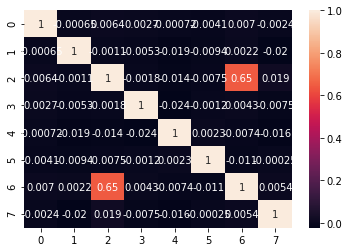

In [61]:
sns.heatmap(X_scaled.corr(),annot=True)

# Using STACKING Ensemble Technique

***Our BASE MODEL has KNN Classifier and SVC***

In [62]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
import numpy as np

In [63]:
# let's divide our dataset into training set and hold out set by 50%
train,val_train,test,val_test = train_test_split(X_scaled,y,test_size=0.5, random_state= 355)

In [64]:
# let's split the training set again into training and test dataset 
x_train,x_test,y_train,y_test =  train_test_split(train,test,test_size=0.2, random_state= 355)

In [65]:
knn = KNeighborsClassifier()

knn.fit(x_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [66]:
knn.score(x_test,y_test)

0.8877777777777778

In [81]:
# saving the model to the local file system
filename = 'knnbase_model.pickle'
pickle.dump(knn, open(filename, 'wb'))

In [67]:
svm = SVC()
svm.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [68]:
svm.score(x_test,y_test)

0.876547619047619

In [82]:
# saving the model to the local file system
filename = 'svcbase_model.pickle'
pickle.dump(svm, open(filename, 'wb'))

In [69]:
predict_val1 = knn.predict(val_train)
predict_val2 = svm.predict(val_train)

In [70]:
predict_val = np.column_stack((predict_val1,predict_val2))
predict_val

array([[0, 0],
       [0, 0],
       [0, 0],
       ...,
       [0, 0],
       [0, 0],
       [0, 0]])

In [71]:
predict_test1 = knn.predict(x_test)
predict_test2 = svm.predict(x_test)

In [72]:
predict_test = np.column_stack((predict_test1,predict_test2))
predict_test

array([[0, 0],
       [0, 0],
       [1, 0],
       ...,
       [0, 0],
       [1, 0],
       [0, 0]])

***Using Random Forest for META_MODEL***

In [73]:
rand_clf = RandomForestClassifier()

rand_clf.fit(predict_val,val_test)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [74]:
rand_clf.score(predict_test,y_test)

0.8877777777777778

In [86]:
result = rand_clf.predict(predict_test)

**Saving model**

In [76]:
import pickle

In [77]:
# saving the model to the local file system
filename = 'finalized_model.pickle'
pickle.dump(rand_clf, open(filename, 'wb'))

In [80]:
# prediction using the saved model
loaded_model = pickle.load(open(filename, 'rb'))
a=loaded_model.predict([[0,0]])
a

array([0])

In [83]:
from sklearn.metrics import *

In [87]:
print(confusion_matrix(y_test,result))
print("Accuracy Score {}".format(accuracy_score(y_test,result)))
print("Classification report: {}".format(classification_report(y_test,result)))

[[20876  1213]
 [ 1615  1496]]
Accuracy Score 0.8877777777777778
Classification report:               precision    recall  f1-score   support

           0       0.93      0.95      0.94     22089
           1       0.55      0.48      0.51      3111

    accuracy                           0.89     25200
   macro avg       0.74      0.71      0.73     25200
weighted avg       0.88      0.89      0.88     25200



## Our data is Imbalance. So, our score with Imbalance dataset is as Above.
# Oversampling of data can be performed will be performed in seprate file.
#Not necessary result will improve